<a href="https://colab.research.google.com/github/MariamA-Helal/Medical-Insurance-Predictor/blob/main/Medical_Insurance__Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.key())[0]

if filename.endswith('.csv'):
  df = pd.read_csv(io.bytesIO(uploaded[filename]))
else:
  df = pd.read_excel(io.bytesIO(uploaded[filename]))
print("THe data is succussfully uplouded")
display(df.head())


Saving insurance.csv to insurance.csv


AttributeError: 'dict' object has no attribute 'key'

In [6]:
df = pd.read_csv('insurance.csv')
print("The data is successfully uploaded!")
display(df.head())



The data is successfully uploaded!


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


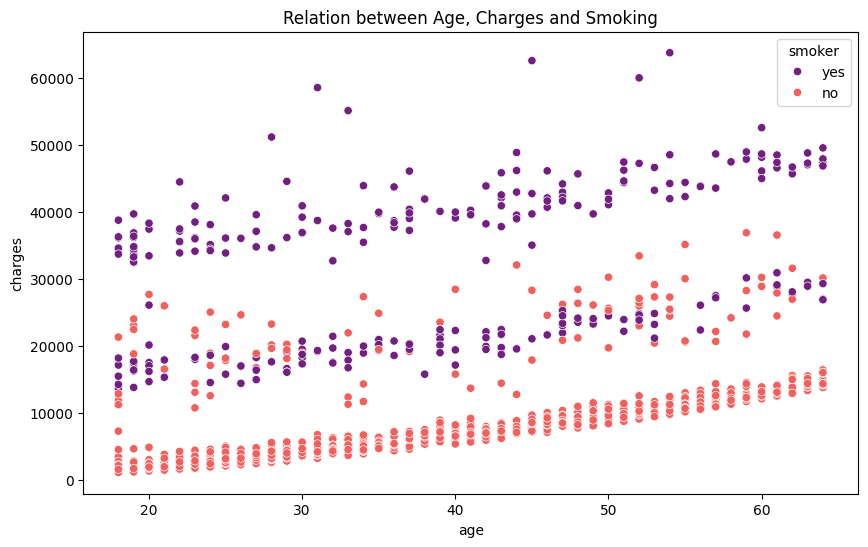

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='magma')
plt.title('Relation between Age, Charges and Smoking')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

df_final = pd.get_dummies(df, drop_first= True)

x = df_final.drop('charges', axis=1)
y = df_final['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

predictions = model.predict(x_test)
score = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"Model Accuracy: {score * 100: .2f}%")
print(f"Mean Error Predicted: {mae:.2f} Dollars")

Model Accuracy:  86.51%
Mean Error Predicted: 2550.08 Dollars


In [11]:
import joblib

joblib.dump(model, 'insurance_model.pkl')
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("The Model Saved Successfully!")

The Model Saved Successfully!


In [13]:
loaded_model = joblib.load('insurance_model.pkl')

custom_data = pd.DataFrame({
    'age':[27],
    'bmi':[25.5],
    'children':[1],
    'sex_male':[1],
    'smoker_yes':[0],
    'region_northwest':[0],
    'region_southeast':[1],
    'region_southwest':[0]
})

prediction = loaded_model.predict(custom_data)
print(f"The expected cost for this person is: {prediction[0]:.2f} Dollars")

The expected cost for this person is: 5357.00 Dollars


**Model Goal:** To build an Artificial Intelligence model capable of predicting medical insurance costs based on patient demographic and health data.

**Key Findings:** Data visualization clearly indicates that Smoking is the most significant factor increasing insurance charges, followed by Age.

**Model Performance:** The model achieved an accuracy (R² Score) of 86.5% using the Random Forest Regressor algorithm, which is considered an excellent performance for this dataset.

**Final Outcome:** We have successfully developed and saved a trained model file (insurance_model.pkl), ready to be integrated into software applications via APIs.